![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 06 | Principal Component Analysis (PCA)

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [1]:
import seaborn as sns #!

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
dodge colt,28.0,4,90.0,75.0,2125,14.5,74,usa
dodge magnum xe,17.5,8,318.0,140.0,4080,13.7,78,usa
chevy c10,13.0,8,350.0,145.0,4055,12.0,76,usa
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
buick skyhawk,21.0,6,231.0,110.0,3039,15.0,75,usa


In [2]:
df=df.dropna()

In [3]:
import pandas as pd

In [4]:
df_mg = pd.get_dummies(data=df, drop_first=True)

## Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [11]:
scaler.fit(X=df_mg)

StandardScaler()

In [12]:
scaled = scaler.transform(df_mg)

In [19]:
df_scaled = pd.DataFrame(scaled, columns=df_mg.columns, index=df_mg.index)
df_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...
ford mustang gl,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.50239,0.774597
vw pickup,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-0.50239,-1.290994
dodge rampage,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.50239,0.774597


## `KMeans()` Model in Python

### Fit the Model

In [15]:
from sklearn.cluster import KMeans

In [16]:
kms = KMeans(n_clusters=3)

In [17]:
kms.fit(df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [18]:
kms.predict(df_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,

### Create a New DataFrame for the Predictions

In [21]:
df_pred = df_scaled.copy()

In [22]:
df_pred.insert(0, 'pred_kms', kms.predict(df_scaled))
df_pred

,pred_kms,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,,
chevrolet chevelle malibu,2,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,2,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,2,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,2,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597
...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,1,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,1.636410,-0.50239,0.774597
vw pickup,0,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,-0.50239,-1.290994
dodge rampage,1,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.50239,0.774597


### Visualize the Model

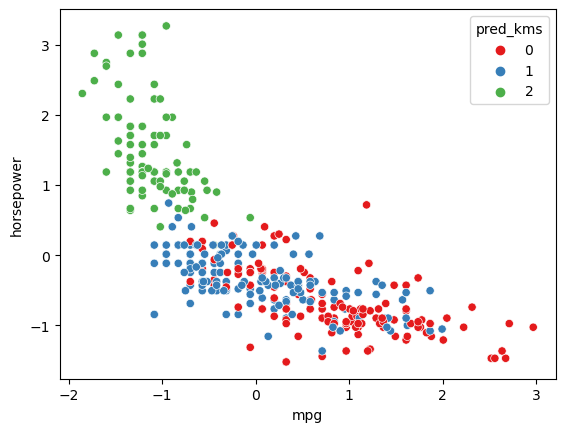

In [58]:
sns.scatterplot(x='mpg', y='horsepower', data=df_pred, hue='pred_kms', palette='Set1');

### Model Interpretation

- Does the visualization makes sense?
- The points are mixed between the groups, why?
- We are **just representing 2 variables**
- And the model was **fitted with 7 variables**

## Grouping Variables with `PCA()`

In [ ]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Transform Data to Components

- `PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df`
2. Normalized Data `dfnorm`
3. Principal Components Data `dfpca` (now)

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA()

In [62]:
pca.fit(df_scaled)

PCA()

In [63]:
df_pca=pca.transform(df_scaled)

In [64]:
group_pca = [f'PC{i}' for i in list (range(1,10))]

In [65]:
data_pca = pd.DataFrame(df_pca, index=df_mg.index, columns=group_pca)
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.468860,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.009370,0.213293,0.073620
plymouth satellite,3.070489,0.942217,0.473735,-0.870489,-0.313946,0.723960,-0.214271,0.143188,-0.083888
amc rebel sst,3.020337,0.789743,0.661786,-0.571355,-0.319349,0.528048,-0.229069,0.292331,-0.147325
ford torino,3.007717,0.965885,0.517871,-0.996022,-0.358667,0.575475,-0.469787,-0.001799,-0.174247
...,...,...,...,...,...,...,...,...,...
ford mustang gl,-0.982108,-1.420514,-1.047497,-0.683221,-0.120900,-0.637493,0.201264,-0.166382,0.015283
vw pickup,-4.036985,-2.127140,-0.261675,1.418216,1.221944,1.416191,0.579246,0.291104,0.119184
dodge rampage,-1.126808,-0.789214,-1.522869,-2.097001,-0.237654,-0.251873,-0.030813,-0.221787,0.045670


### Visualize Components & Clusters

- A **scatterplot** with `PC1` & `PC2`
- Colour points by cluster
- Are they **mixed** now?

In [66]:
import plotly.express as px

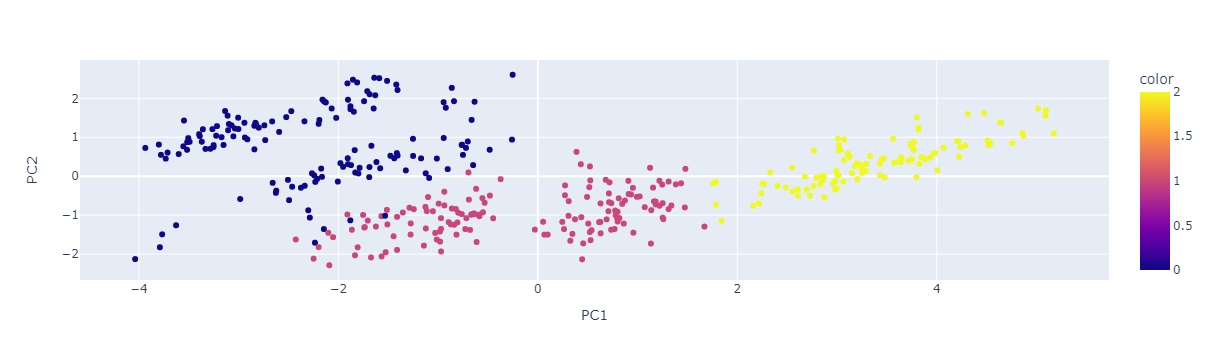

In [75]:
px.scatter(data_frame=data_pca, x='PC1', y='PC2', color=df_pred.pred_kms, hover_name=df_mg.index)

### PCA & Clustering Interpretation

In [81]:
pca.explained_variance_

array([5.67733447, 1.18808815, 0.87576522, 0.6008606 , 0.30335758,
       0.18269726, 0.11140801, 0.05316111, 0.03034551])

In [82]:
pca.explained_variance_ratio_

array([0.62920572, 0.13167304, 0.09705901, 0.06659198, 0.03362041,
       0.02024791, 0.01234709, 0.00589172, 0.00336312])

In [83]:
pca.singular_values_

array([47.11515445, 21.55324727, 18.50470758, 15.32763829, 10.89095092,
        8.45190078,  6.60004015,  4.55916589,  3.44457436])

## Relationship between Original Variables & Components

- [ ] What do the columns PC1 & PC2 have to do with the original variables (speeding, alcohol, total,...)?

### Loading Vectors

In [87]:
df_weights = pd.DataFrame(pca.components_.T, columns=group_pca, index=df_mg.columns)

In [80]:
df_weights.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,-0.374705,-0.046189,-0.257296,-0.199342,0.031205,0.755299,0.354683,-0.195030,-0.127427
cylinders,0.390297,0.020630,-0.163054,0.222610,-0.000059,0.472667,-0.549276,0.314814,-0.383243
displacement,0.404817,0.014770,-0.150779,0.153581,-0.009156,0.297809,0.004035,-0.121299,0.828299
horsepower,0.385138,0.233024,-0.156907,-0.007860,0.169984,-0.055093,0.667713,0.528806,-0.123615
weight,0.390189,-0.040777,-0.136605,0.342554,0.205570,-0.106440,0.196891,-0.707468,-0.342374
acceleration,-0.249862,-0.447718,0.279268,0.743318,0.005795,0.103036,0.213376,0.221399,0.037513
model_year,-0.201926,-0.346888,-0.826340,0.063921,0.175107,-0.294713,-0.113877,0.128827,0.069917
origin_japan,-0.228405,0.607000,-0.276675,0.411797,-0.570073,-0.068650,0.033738,-0.047016,-0.014582
origin_usa,0.295694,-0.502024,-0.061804,-0.208639,-0.756379,-0.029489,0.168039,-0.013082,-0.108621


### Correlation Matrix

<AxesSubplot:>

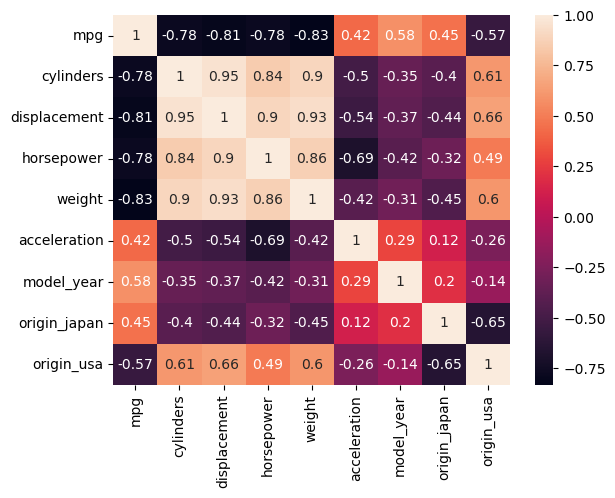

In [84]:
sns.heatmap(df_scaled.corr(), annot=True)

- [ ] Which conclusions could you relate from the relationship of the 2 previous plots?

### Calculating One PCA Value

- [ ] How did we obtain `2.77` for **chevrolet chevelle malibu** in **PC1**?

In [93]:
df_weights.PC1

mpg            -0.374705
cylinders       0.390297
displacement    0.404817
horsepower      0.385138
weight          0.390189
acceleration   -0.249862
model_year     -0.201926
origin_japan   -0.228405
origin_usa      0.295694
Name: PC1, dtype: float64

In [100]:
df_scaled.iloc[0,:]

mpg            -0.698638
cylinders       1.483947
displacement    1.077290
horsepower      0.664133
weight          0.620540
acceleration   -1.285258
model_year     -1.625315
origin_japan   -0.502390
origin_usa      0.774597
Name: chevrolet chevelle malibu, dtype: float64

In [101]:
(df_weights['PC1']*df_scaled.iloc[0,:]).sum()

2.768101540871218

## Explained Variance Ratio

### Biplot

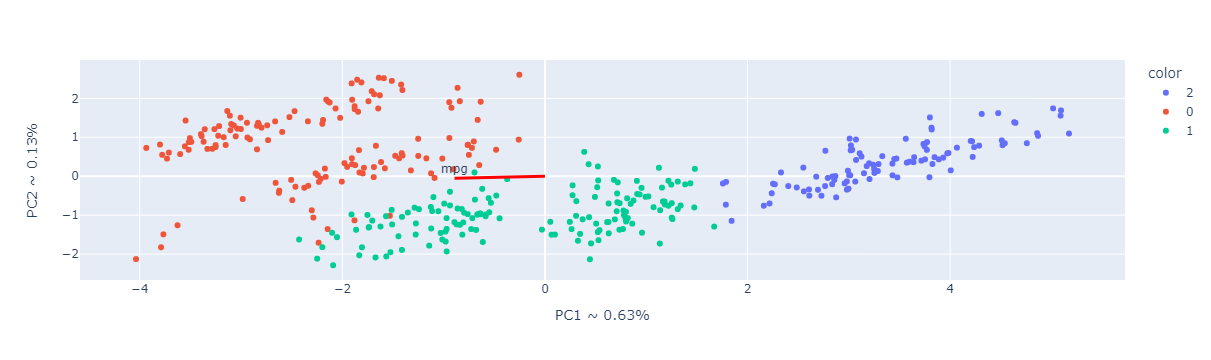

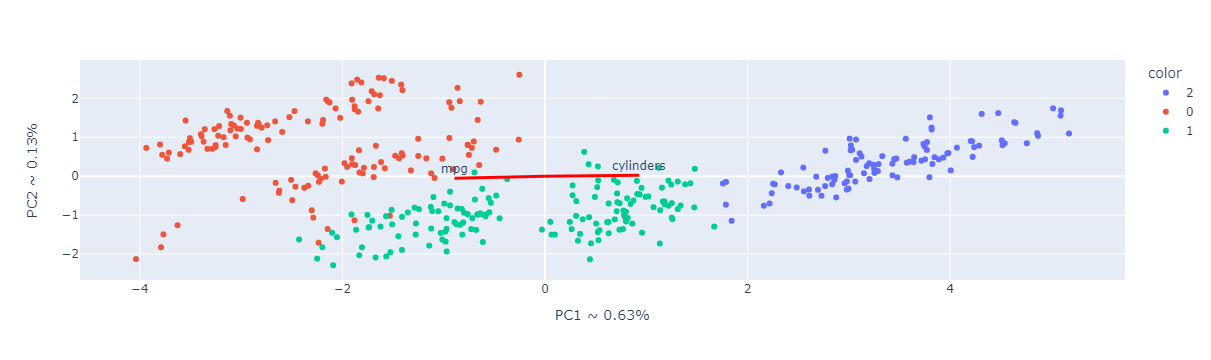

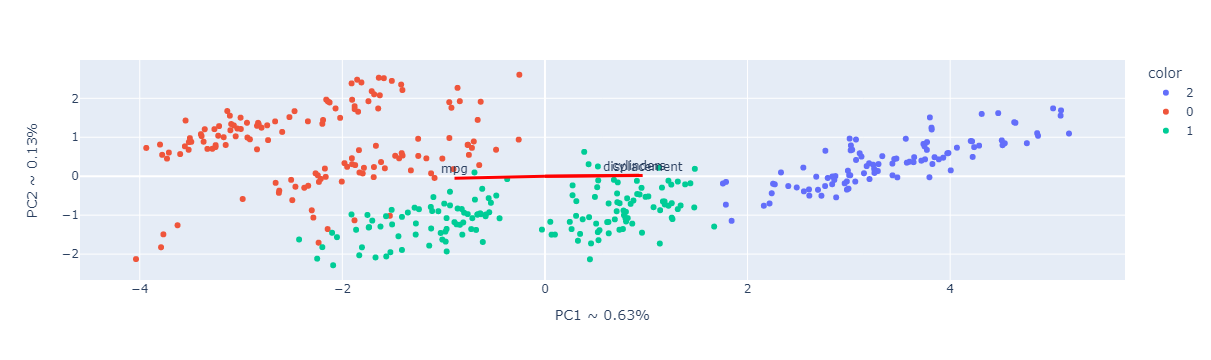

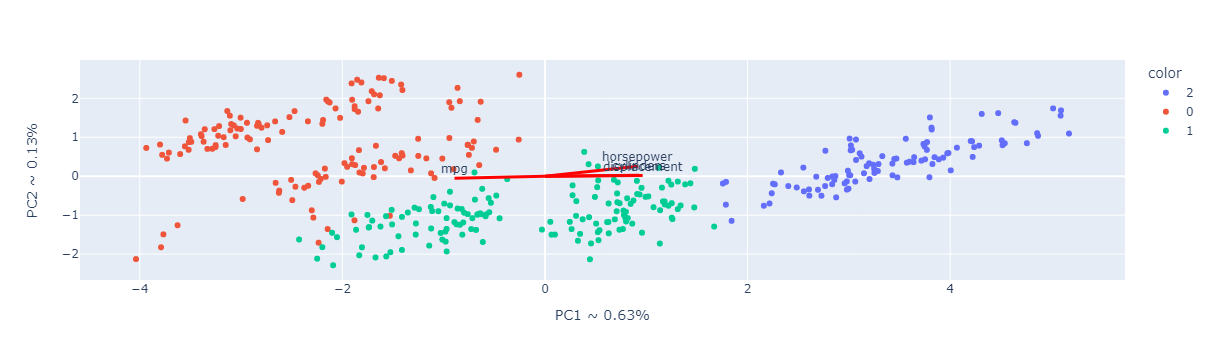

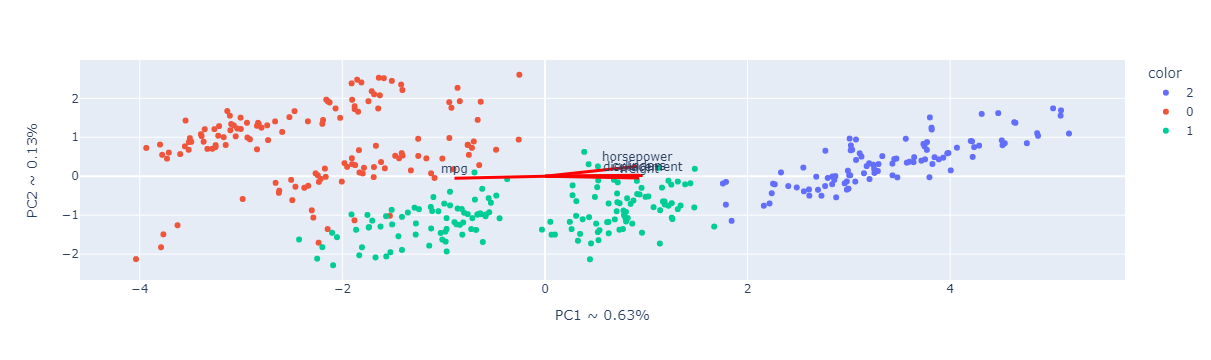

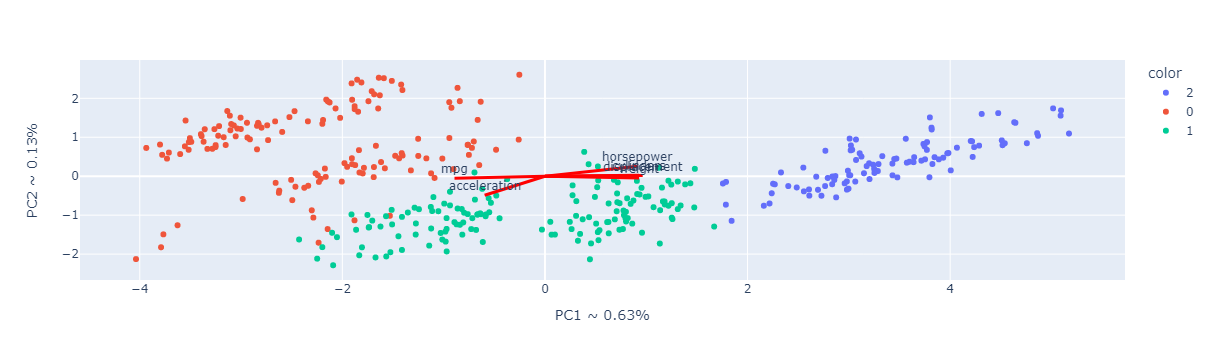

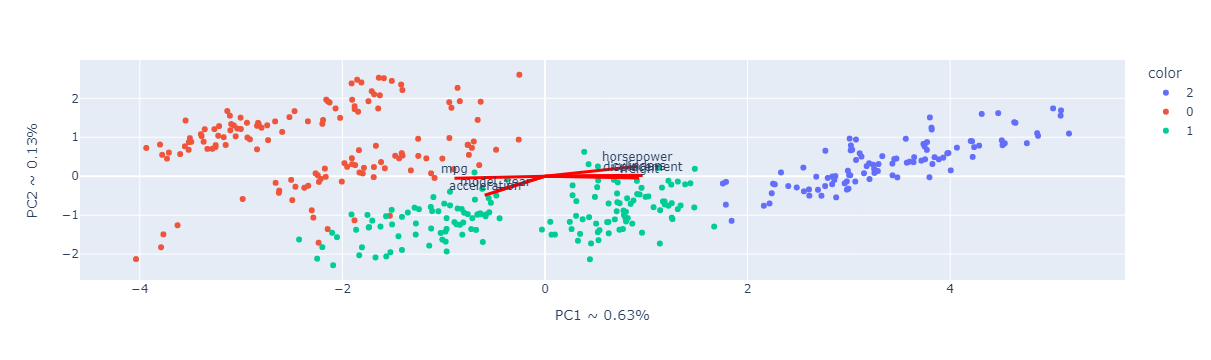

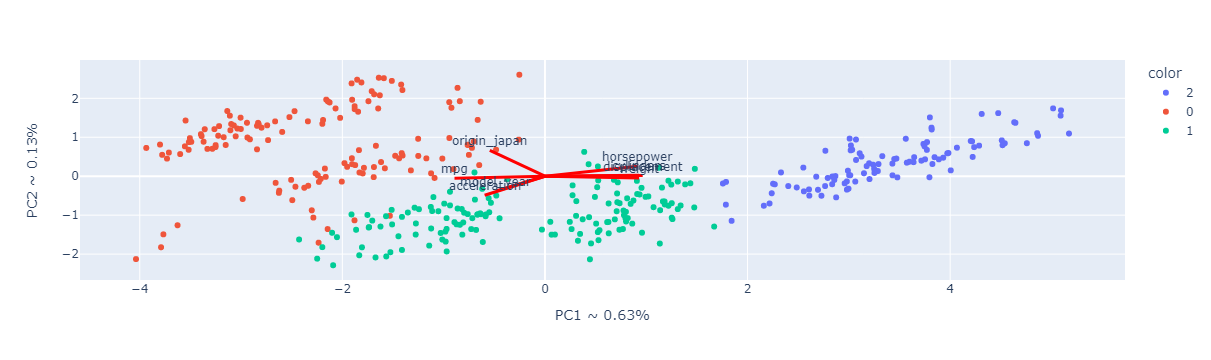

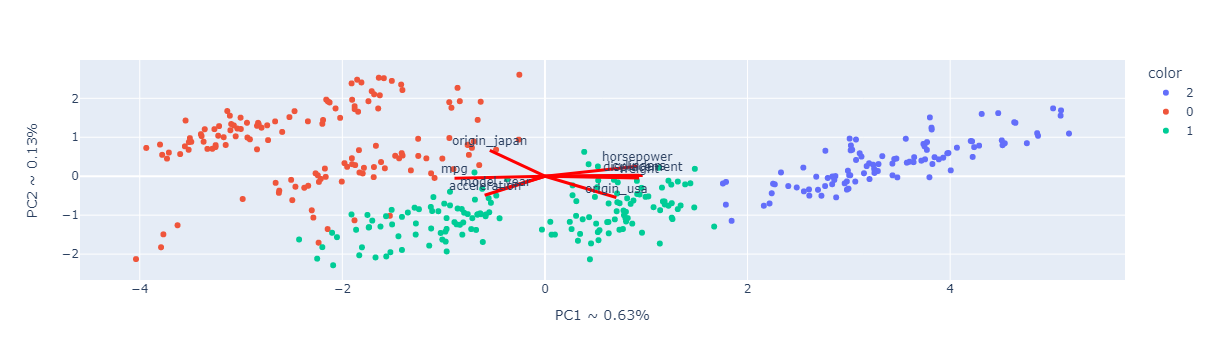

In [105]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
evr = pca.explained_variance_ratio_.round(2)

fig = px.scatter(data_pca, x='PC1', y='PC2',
                 color=kms.labels_.astype(str),
                 hover_name=data_pca.index,
                labels={
                    'PC1': f'PC1 ~ {evr[0]}%',
                    'PC2': f'PC2 ~ {evr[1]}%'
                })

for i, feature in enumerate(df_scaled.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
    
    fig.show()

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand the role of **Linear Algebra** on Machine Learning
    - Matrix Multiplications with the `loadings`
- [X] Necessity to `StandardScaler()` the data when the algorithm implies distance calculations
- [X] Understand that every Machine Learning process is a matter of optimization
    - To find the best numbers based on a criteria
    - How is done in `PCA()`?
- [X] Why would you use PCA?
    - Visualization
    - Preprocess the data for modelling
- [X] There are techniques for everything
    - [X] Grouping observations
    - [X] Grouping variables

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.